# 서울시 25개 구별 개업 및 폐업

In [1]:
import pandas as pd
import re
import numpy as np
import os
import csv
from pandas import DataFrame

In [2]:
% pwd

'C:\\Users\\차소영'

In [3]:
file_path='./project/m3'

In [4]:
df = pd.read_csv('./project/m3/districts/seoul_food_gu.csv', header = 0, encoding = 'utf-8', low_memory=False)
df.head(5)

,구,년도,법인명,소재지도로명,소재지지번,업소명,업종명,업태명,영업자시작일,폐업일자
0,은평구,2014,NaN,"서울특별시 은평구 갈현로 7-2, (신사동, 2층)",서울특별시 은평구 신사동 17번지 11호 2층,2월7일,일반음식점,호프/통닭,20140224.0,NaN
1,은평구,2014,NaN,"서울특별시 은평구 수색로 217, (수색동, DMC 자이상가 1층108호)",서울특별시 은평구 수색동 75번지 DMC 자이상가 1층108호,오봉도시락,휴게음식점,일반조리판매,20141010.0,NaN
2,은평구,1999,NaN,"서울특별시 은평구 연서로28길 7-4, (대조동)",서울특별시 은평구 대조동 185번지 16호,명송회집,일반음식점,분식,20130308.0,20131220.0
3,은평구,2013,NaN,"서울특별시 은평구 갈현로19길 4, (갈현동, 103,104호)","서울특별시 은평구 갈현동 506번지 9호 103,104호",장충왕족발보쌈,일반음식점,호프/통닭,20130808.0,20141226.0
4,은평구,2016,NaN,"서울특별시 은평구 은평로16길 8, (응암동)",서울특별시 은평구 응암동 72번지 3호 1층,예쁜 뽀들이 함바,일반음식점,한식,20161129.0,NaN


In [5]:
# 구이름 설정
districts = ['은평구', '종로구', '용산구', '중구', '중랑구', '동대문구', '동작구', '마포구', '서초구', '서대문구', '성북구', '성동구', '송파구', '양천구', '영등포구', '강남구', '강동구', '강북구', '강서구', '관악구']

In [6]:
# 년도 설정
years = ['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']

In [7]:
# astype =  Numpy array 형변환 하는 방법

df['영업시작년도'] = df.영업자시작일.astype('str').str[:4]
df['폐업년도'] = df.폐업일자.astype('str').str[:4]

In [8]:
# isin 구문은 열이 list의 값들을 포함하고 있는 모든 행들을 골라낼 때 주로 쓰인다.

df_opened = df[df.영업시작년도.isin(years)]
df_closed = df[df.폐업년도.isin(years)]
print(df_opened.shape, df_closed.shape)

(297735, 12) (199327, 12)


In [9]:
# 신규 개업한 업소
df_opened_pt = df_opened.pivot_table(values='업소명', index=['구'], 
               columns=['영업시작년도'], aggfunc='count')
df_opened_pt

영업시작년도,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
구,,,,,,,,,,,
강남구,2404,2597,2805,3011,3092,2957,2989,3651,3649,4260,4725
강동구,1149,994,1204,1399,1255,1205,1129,1356,1382,1407,1400
강북구,726,676,771,712,849,794,715,832,884,947,1116
강서구,1003,1055,1122,1134,1252,1120,1143,1286,1400,1494,2101
관악구,1122,925,1350,1370,1297,1199,1207,1380,1387,1559,1561
동대문구,1017,1015,1183,1392,1246,1218,1150,1450,1484,1635,1997
동작구,638,606,755,888,810,876,904,1018,1029,1285,1496
마포구,1162,1173,1344,1558,1671,1679,1887,2323,2493,2965,3638
서대문구,746,770,765,839,927,867,927,1024,1143,1429,1715


In [10]:
# 폐업한 업소
df_closed_pt = df_closed.pivot_table(values='업소명', index=['구'], 
               columns=['폐업년도'], aggfunc='count')
df_closed_pt

폐업년도,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
구,,,,,,,,,,,
강남구,1981,1252,1595,1871,2092,2094,2230,2451,2834,3352,3750
강동구,576,1286,672,953,1018,1255,884,760,958,1250,1703
강북구,464,529,585,602,526,488,558,509,613,713,741
강서구,546,747,744,848,1128,1009,1041,1013,991,956,994
관악구,588,629,754,899,1430,1065,1487,921,1063,1284,1199
동대문구,1111,894,1043,1316,1114,768,803,822,1266,952,1197
동작구,692,678,659,785,924,616,568,536,938,645,763
마포구,1309,916,875,1048,1658,1226,1773,1233,1238,1396,1492
서대문구,708,723,687,662,775,734,590,619,792,789,1050


In [11]:
# 해당년도에 개업 및 폐업한 점포 수 
df_rate_list = []
for dist in districts:
    for year in years:
        data = [dist, year, df_opened_pt.loc[dist, year], df_closed_pt.loc[dist, year]]
        df_rate_list.append(data)
df_rate = pd.DataFrame(df_rate_list, columns=['district', 'year', 'opened', 'closed'])
df_rate

,district,year,opened,closed
0,은평구,2007,465,37
1,은평구,2008,476,156
2,은평구,2009,544,203
3,은평구,2010,672,279
4,은평구,2011,692,308
5,은평구,2012,698,338
6,은평구,2013,670,338
7,은평구,2014,858,357
8,은평구,2015,884,478
9,은평구,2016,1172,466


In [12]:
# 폐업/개업*100 = 폐업률
df_rate['closing_rate'] = (df_rate['closed'] / df_rate['opened'])*100
df_rate

,district,year,opened,closed,closing_rate
0,은평구,2007,465,37,7.956989
1,은평구,2008,476,156,32.773109
2,은평구,2009,544,203,37.316176
3,은평구,2010,672,279,41.517857
4,은평구,2011,692,308,44.508671
5,은평구,2012,698,338,48.424069
6,은평구,2013,670,338,50.447761
7,은평구,2014,858,357,41.608392
8,은평구,2015,884,478,54.072398
9,은평구,2016,1172,466,39.761092


In [13]:
df_rate.isnull().sum()

district        0
year            0
opened          0
closed          0
closing_rate    0
dtype: int64

In [14]:
df_rate.describe()

,opened,closed,closing_rate
count,220.000000,220.000000,220.000000
mean,1353.340909,906.031818,65.719880
std,775.120457,586.171857,25.327159
min,340.000000,22.000000,3.942652
25%,812.250000,507.750000,49.859812
50%,1146.000000,803.500000,65.826846
75%,1648.750000,1231.250000,79.532199
max,4725.000000,3750.000000,143.689320


In [15]:
df_rate.shape

(220, 5)

# 시각화 해보기

In [16]:
import warnings
warnings.filterwarnings('ignore')

In [17]:
import pandas as pd
import numpy as np
import re
from plotnine import *
%matplotlib inline
import plotnine as p9

In [18]:
songpa = df_rate[df_rate["district"].str.contains("송파구", regex=True)]

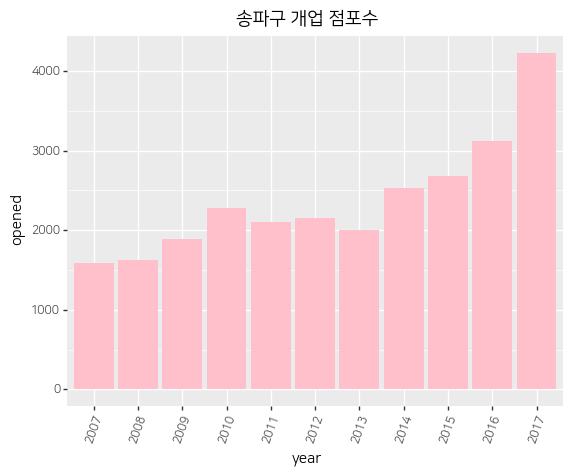

<ggplot: (-9223371883374918326)>

In [19]:
 (ggplot(songpa)
 + aes(x='year', y='opened')
 + geom_col(fill='pink')
 + ggtitle('송파구 개업 점포수')
 + theme(text=element_text(family='Nanumsquare'),
        axis_text_x=element_text(rotation=70))
)

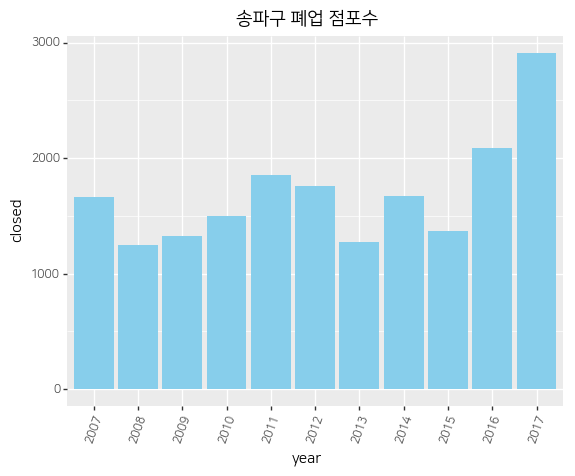

<ggplot: (153479865485)>

In [20]:
  (ggplot(songpa)
 + aes(x='year', y='closed')
 + geom_col(fill='skyblue')
 + ggtitle('송파구 폐업 점포수')
 + theme(text=element_text(family='Nanumsquare'),
        axis_text_x=element_text(rotation=70))
)

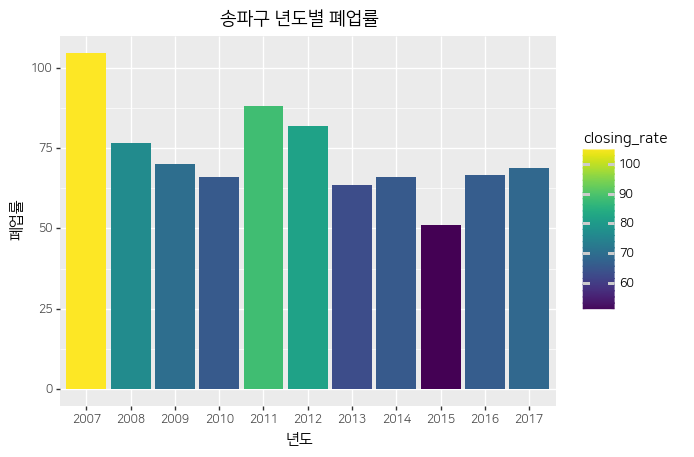

<ggplot: (153479954531)>

In [21]:
(ggplot(songpa, aes(x='year', y='closing_rate', fill='closing_rate'))
 + geom_bar(stat='identity', position='dodge')
 + ggtitle('송파구 년도별 폐업률')
 + xlab('년도')
 + ylab('폐업률')
 + theme(text=element_text(family='Nanumsquare'))
)

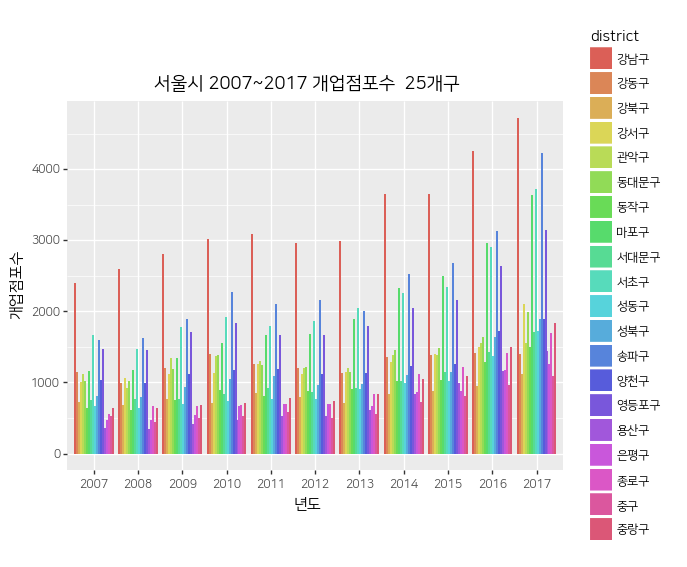

<ggplot: (153479864524)>

In [22]:
# 개업점포 수는 매년 증가하고있다.

(ggplot(df_rate, aes(x='year', y='opened', fill='district'))
 + geom_bar(stat='identity', position='dodge')
 + ggtitle('서울시 2007~2017 개업점포수  25개구')
 + xlab('년도')
 + ylab('개업점포수')
 + theme(text=element_text(family='Nanumsquare'))
)

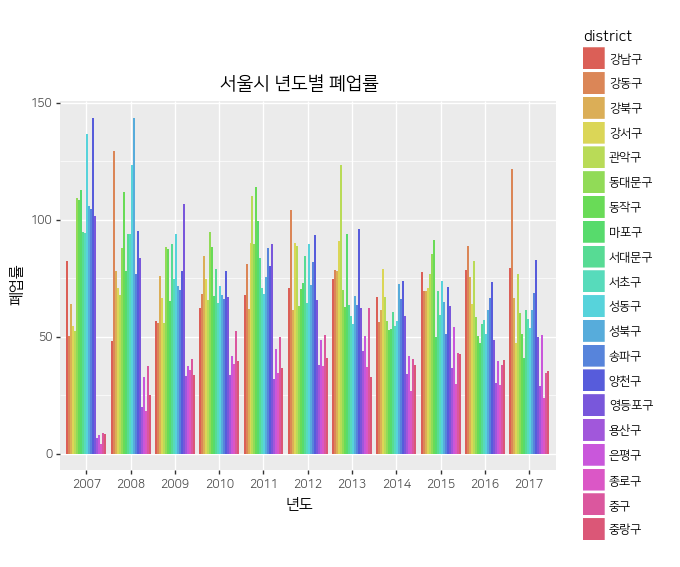

<ggplot: (-9223371883371039137)>

In [23]:
# 점점 폐업률이 줄어드는 것을 확인할 수 있다.

(ggplot(df_rate, aes(x='year', y='closing_rate', fill='district'))
 + geom_bar(stat='identity', position='dodge')
 + ggtitle('서울시 년도별 폐업률')
 + xlab('년도')
 + ylab('폐업률')
 + theme(text=element_text(family='Nanumsquare'))
)

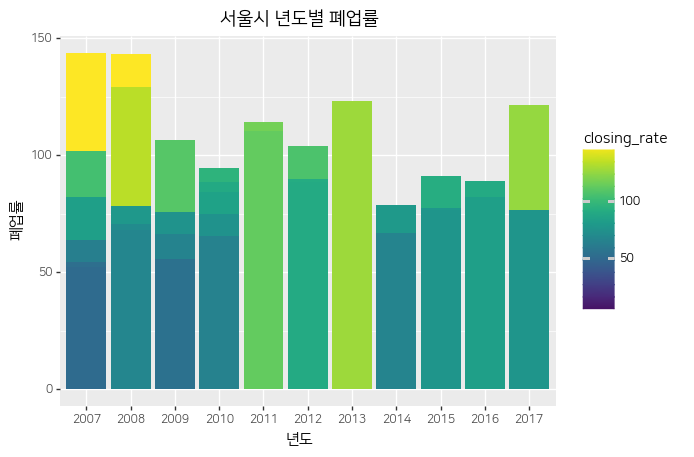

<ggplot: (153483910818)>

In [24]:
# 폐업률이 100% 이상을 나타내는 노란색이 2007년과 2008년에는 많았는데, 최근 몇년간 많이 줄어들었다.

(ggplot(df_rate, aes(x='year', y='closing_rate', fill='closing_rate'))
 + geom_bar(stat='identity', position='dodge')
 + ggtitle('서울시 년도별 폐업률')
 + xlab('년도')
 + ylab('폐업률')+ theme(text=element_text(family='Nanumsquare'))
 
)

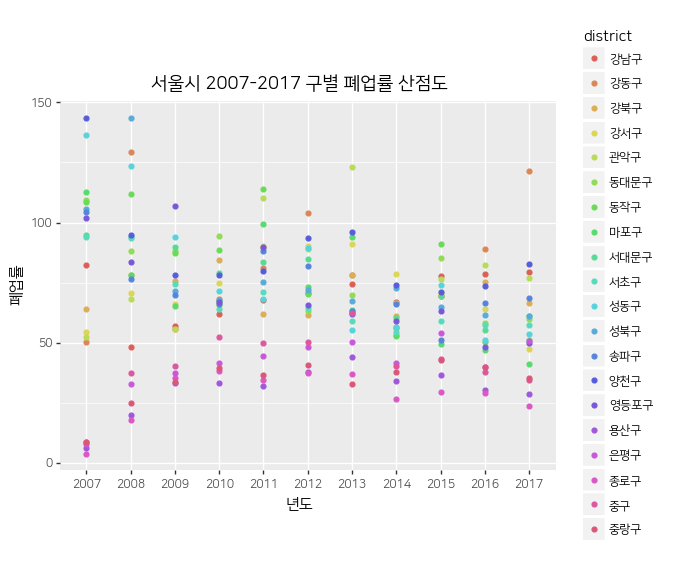

<ggplot: (153483944680)>

In [25]:
(p9.ggplot(data=df_rate,
           mapping=p9.aes(x='year', y='closing_rate', color='district'))
    + xlab('년도') + ylab('폐업률') + ggtitle('서울시 2007-2017 구별 폐업률 산점도')
    + p9.geom_point() +theme(text=element_text(family='Nanumsquare'))
)

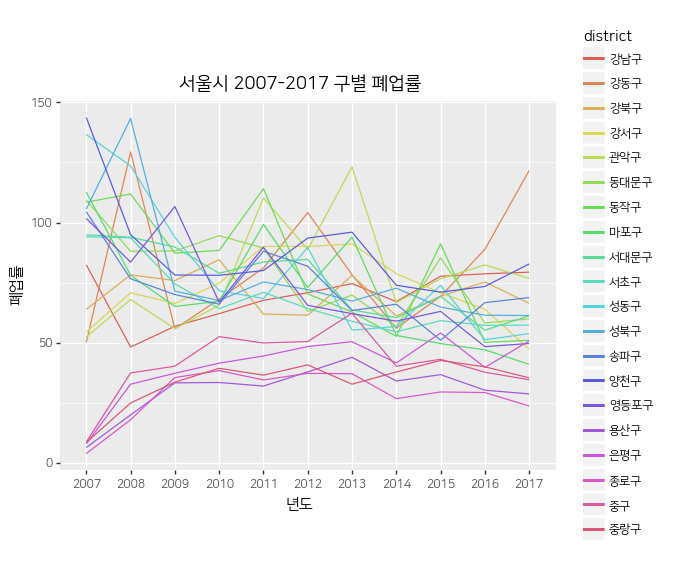

<ggplot: (-9223371883370978588)>

In [26]:
(p9.ggplot(data=df_rate,
           mapping=p9.aes(x='year',
                          y='closing_rate',
                          group='district',
                          color='district'))
    + xlab('년도') + ylab('폐업률') + ggtitle('서울시 2007-2017 구별 폐업률')
    + p9.geom_line() +theme(text=element_text(family='Nanumsquare'))
)